In [2]:
from zget_data import get_responses, get_qdetails, get_questions, page_map, quest_map, attention
from collections import defaultdict
import pandas as pd
import json

In [3]:
password_response, time_response, survey_response, dids = get_responses()

Total: 120; 
Attentive: 104; Non Attentive: 16


## Password Analysis

In [4]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
2,Chevy68#,NaN,NaN,NaN
3,igahot6844$,NaN,NaN,NaN
4,Password123!,NaN,NaN,NaN
...,...,...,...,...
99,bm@1994,NaN,NaN,NaN
100,Litn2023!,NaN,NaN,NaN
101,Isacd4md!,NaN,NaN,NaN
102,Ciara@9044,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
2,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
3,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
4,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283


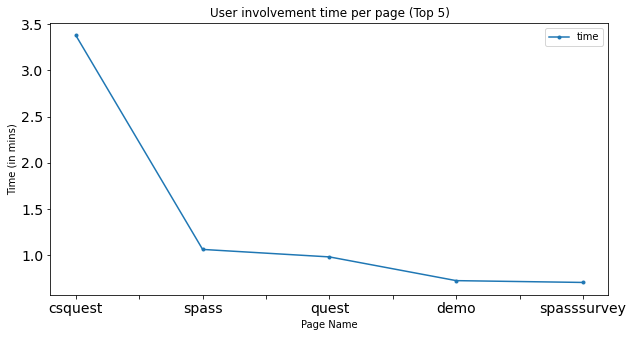

In [57]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [5]:
questions = get_questions()
survey_response_df = pd.DataFrame(survey_response)
# display(survey_response_df.head(1))

survey_response_df['did'] = dids
survey_response_df.groupby(by='did').size().reset_index(name='counts')

,did,counts
0,1,26
1,2,26
2,3,26
3,4,26


### Quest

In [6]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['std'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,mean,median,std
rewarding,6.0,6.0,6.0,6.0,2.0,5.0,6.0,5.0,6.0,6.0,...,6.0,4.0,7.0,3.0,5.0,7.0,5.0,5.230769,6.0,1.515154
organized,7.0,7.0,7.0,5.0,4.0,6.0,6.0,7.0,7.0,7.0,...,3.0,6.0,7.0,4.0,6.0,6.0,6.0,5.894231,6.0,1.178569
structured,7.0,7.0,6.0,5.0,5.0,5.0,6.0,6.0,7.0,6.0,...,7.0,6.0,7.0,4.0,7.0,6.0,7.0,5.932692,6.0,1.156898
well grouped,7.0,6.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,7.0,...,4.0,5.0,7.0,4.0,6.0,7.0,6.0,5.942308,6.0,1.031214
ordered,7.0,6.0,6.0,5.0,3.0,6.0,6.0,5.0,7.0,7.0,...,2.0,7.0,7.0,3.0,6.0,6.0,7.0,5.461538,6.0,1.668000
beneficial,7.0,7.0,6.0,6.0,2.0,6.0,5.0,6.0,5.0,7.0,...,7.0,6.0,7.0,4.0,6.0,6.0,5.0,5.548077,6.0,1.609383
helpful,7.0,7.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,7.0,...,6.0,5.0,7.0,3.0,7.0,6.0,5.0,6.019231,6.0,1.146265
easy,5.0,6.0,7.0,6.0,3.0,6.0,3.0,6.0,6.0,7.0,...,2.0,5.0,7.0,2.0,4.0,7.0,3.0,5.500000,6.0,1.435096
appealing,6.0,7.0,6.0,6.0,2.0,4.0,4.0,4.0,7.0,6.0,...,1.0,5.0,7.0,2.0,5.0,6.0,6.0,5.432692,6.0,1.344646
pleasant,4.0,7.0,7.0,6.0,3.0,3.0,6.0,4.0,6.0,6.0,...,1.0,5.0,7.0,2.0,6.0,6.0,5.0,5.557692,6.0,1.379605


In [7]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k} Mean: {v["mean"].mean()}')

for k, v in cats.items():
    print(f'{k} Median: {v["median"].median()}')

Perspicuity Mean: 5.586538461538462
Aesthetics Mean: 5.1514423076923075
Usefulness Mean: 5.5793269230769225
Clarity Mean: 5.8076923076923075
Perspicuity Median: 6.0
Aesthetics Median: 5.5
Usefulness Median: 6.0
Clarity Median: 6.0


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())
qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Government Websites, Con...","[E-commerce Websites, Course Management Websit...",...,"[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, E-commerce Websites]","[Financial Websites, Gaming Websites, E-commer...","[Social Media, Email, Financial Websites, E-co...","[Financial Websites, Government Websites, Cour...","[Social Media, Email, E-commerce Websites, Gov...",[Social Media],"[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Government Websites]","[Social Media, Course Management Websites, e.g..."
11-1,"I like the idea. I like the example phrase ""I ...",This is entertaining and relatable! It is an i...,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I thought about if I would personally use this...,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is nice. Simple to read and understand. S...,I like it. It gave me a way to come up with a ...,"Its good, useful and a good way to end up maki...",...,The desgin look very creativity and very easy ...,It was simple and clean.,The presentation was to clear and more advance...,"The presentation is clear and clean, it's nice...",It's in a simple comic format that nothing rea...,Clarity and coherence of the content.,Seems simple and affective. I wish the numbers...,I'm pretty certain that it will help me create...,It is very useful in guiding about the passwor...,The presentation is clear and concise. Straigh...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('keyword')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,mean,median
Stimulation,6.0,6.0,6.0,5.0,6.0,7.0,6.0,6.0,6.0,5.0,...,3.0,7.0,3.0,5.0,5.0,6.0,6.0,4.0,5.596154,6.000000
Trust,5.0,7.0,6.0,6.0,5.0,7.0,6.0,5.0,4.0,7.0,...,5.0,3.0,4.0,5.0,5.0,5.0,7.0,4.0,5.403846,6.000000
Real life encouragement,6.0,7.0,6.0,6.0,5.0,7.0,7.0,6.0,6.0,7.0,...,6.0,1.0,2.0,6.0,5.0,5.0,7.0,5.0,5.846154,6.000000
Example helped,7.0,7.0,6.0,6.0,5.0,6.0,6.0,6.0,7.0,6.0,...,7.0,7.0,6.0,6.0,6.0,6.0,6.0,6.0,5.836538,6.000000
Encouragement,7.0,7.0,6.0,6.0,6.0,7.0,7.0,7.0,6.0,7.0,...,5.0,7.0,4.0,7.0,6.0,7.0,7.0,5.0,5.807692,6.000000
Capable,6.0,7.0,6.0,6.0,4.0,6.0,7.0,7.0,7.0,7.0,...,7.0,7.0,5.0,7.0,5.0,6.0,6.0,4.0,5.951923,6.000000
Confident,6.0,7.0,6.0,6.0,5.0,7.0,7.0,7.0,7.0,7.0,...,6.0,7.0,4.0,7.0,5.0,6.0,7.0,4.0,5.961538,6.000000
Personal Connection,6.0,4.0,6.0,6.0,3.0,3.0,6.0,4.0,5.0,5.0,...,5.0,2.0,6.0,6.0,5.0,7.0,6.0,5.0,5.451923,6.000000
Ease to follow message,7.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,0.0,...,6.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,2.990385,1.000000
Novel,7.0,7.0,6.0,6.0,2.0,5.0,7.0,5.0,5.0,2.0,...,6.0,3.0,3.0,7.0,4.0,5.0,5.0,5.0,5.201923,5.000000


### First Password Survey

In [63]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,mean,median
"I do not change my passwords, unless I have to.",6,6,2,6,7,5,6,2,3,5,...,1,7,6,7,5,5,6,7,4.990385,5.0
I use different passwords for different online accounts that I have.,5,6,6,5,5,7,5,6,7,7,...,7,4,2,5,5,6,7,5,5.384615,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,7,6,5,6,7,6,6,7,7,...,6,4,3,5,4,5,6,5,4.980769,5.0
I do not include special characters in my password if it’s not required.,3,1,1,2,4,1,2,2,4,1,...,4,1,5,5,3,4,6,2,3.653846,4.0


### Second Password Survey

<AxesSubplot:xlabel='8-1'>

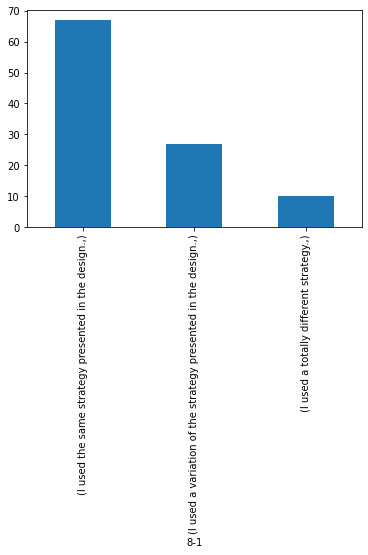

In [10]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())
qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual.to_csv('data/qualitative/spassqual.csv')
spassqual
spassqual.T.value_counts().plot.bar()

In [65]:
spass = spass.drop(qualindex).fillna(0).astype(int)
spass.drop(attention.get('12'), inplace=True)

normqsid = ['3-1', '3-2', '3-3', '7-1']
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)


# normalize scale 1 to 8 to scale -3 to 3
spass = spass - 4
spass.update(spass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,mean,median
Strength of password,2.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,...,3.0,-2.0,1.0,2.0,0.0,3.0,3.0,1.0,2.009615,2.0
Motivation,2.0,3.0,2.0,2.0,0.0,-1.0,3.0,2.0,3.0,3.0,...,2.0,-1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.971154,2.0
Hard to remember,2.0,1.0,3.0,0.0,3.0,2.0,1.0,2.0,0.0,-3.0,...,-3.0,-3.0,-1.0,-3.0,0.0,-1.0,-1.0,-3.0,-0.038462,0.0
Can be easily guessed by a hacker,2.0,2.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0,...,-1.0,1.0,2.0,-3.0,2.0,3.0,2.0,3.0,1.365385,2.0
Can be easily guessed by my close friends or family members,2.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,...,2.0,2.0,3.0,-2.0,3.0,3.0,2.0,3.0,1.461538,3.0
Stronger than the passwords I usually use,2.0,3.0,1.0,1.0,0.0,-1.0,2.0,0.0,0.0,2.0,...,3.0,-3.0,1.0,2.0,0.0,3.0,1.0,-1.0,1.403846,2.0
Helpful,2.0,3.0,1.0,2.0,-2.0,1.0,2.0,1.0,3.0,3.0,...,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,1.798077,2.0
Easy to think personal memory,0.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,...,2.0,2.0,-1.0,2.0,1.0,1.0,3.0,-2.0,1.509615,2.0
Difficult for number and character,2.0,3.0,3.0,2.0,1.0,2.0,-2.0,3.0,2.0,3.0,...,-1.0,-3.0,-1.0,-2.0,1.0,2.0,-2.0,-3.0,0.153846,0.0


### Demographics

In [66]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo.head()

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adopt based on security expert advice
0,Woman,55-59 years old,"[White, Human Caucasian European ]",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6
1,Man,55-59 years old,[White],Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7
2,Woman,50-54 years old,[White],High School Graduate,Business,Business or industry,Self-taught,Self-taught,6
3,Man,55-59 years old,[White],High School Graduate,Construction,Business or industry,Self-taught,No experience,7
4,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5


In [67]:
display(demo['gender'].value_counts())
display(demo['race'].value_counts())
display(demo['highest education'].value_counts())
display(demo['tech experience'].value_counts())
display(demo['cyber experience'].value_counts())

Man                       75
Woman                     28
I prefer not to answer     1
Name: gender, dtype: int64

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[White]                                        72
[Asian]                                        16
[Black or African American]                     5
[Hispanic or Latino]                            3
[White, Native American or American Indian]     1
[White, Hispanic or Latino]                     1
[White, Black or African American]              1
[I prefer not to answer]                        1
[Pacific Islander]                              1
[White, Asian]                                  1
[Native American or American Indian]            1
[White, Human Caucasian European ]              1
Name: race, dtype: int64

Four-year College Degree          65
Graduate degree (MS/Doctorate)    18
Two-year College Degree            9
High School Graduate               9
I prefer not to answer             2
3 years college, no degree         1
Name: highest education, dtype: int64

Self-taught                       42
Pursuing or completed a degree    19
Formal training                   18
Hold or held a work position      17
No experience                      8
Name: tech experience, dtype: int64

Self-taught                       37
No experience                     33
Formal training                   16
Hold or held a work position       9
Pursuing or completed a degree     8
I prefer not to answer             1
Name: cyber experience, dtype: int64